#Test <a href=http://www.ramp.studio/events/iris_test>RAMP on iris</a> 

<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl (LAL/CNRS)</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Fetch the data and load it

## Introduction

The task of HIVA is to predict which compounds are active against the AIDS HIV infection. The dataset have two classes : active or inactive ( Binary Classification). The variables represent properties of the molecule inferred from its structure.

The problem is therefore to relate structure to activity (a QSAR=quantitative structure - activity relationship problem) to screen new compounds before actually testing them (a HTS=high - throughput screening problem)

In [31]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()



In [32]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'hiva'
basename = datadir  + dataname
# !ls $basename*

Reading public_data/hiva_train from AutoML format
Number of examples = 3845
Number of features = 1617
Number of classes = 2


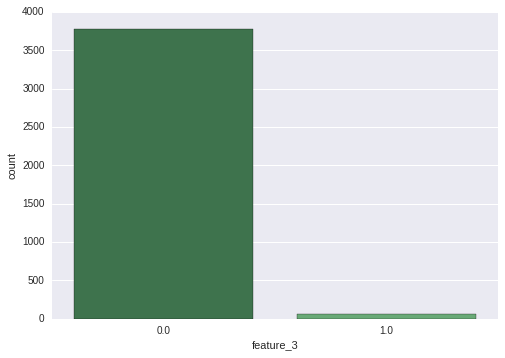

In [33]:
import data_io
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
sns.countplot(x="feature_3", data=data, palette="Greens_d");
#sns.jointplot("feature_3", "tip", data=data,size=5, ratio=3, color="g")



#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

In [34]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1609,feature_1610,feature_1611,feature_1612,feature_1613,feature_1614,feature_1615,feature_1616,feature_1617,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,negative


In [35]:
data.describe() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1608,feature_1609,feature_1610,feature_1611,feature_1612,feature_1613,feature_1614,feature_1615,feature_1616,feature_1617
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,...,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,0.009623,0.022627,0.016905,0.035891,0.061638,0.118336,0.033030,0.008062,0.037191,0.017425,...,0.049935,0.132380,0.018986,0.080104,0.057997,0.072042,0.005982,0.056177,0.065280,0.067620
std,0.097636,0.148730,0.128933,0.186042,0.240529,0.323047,0.178738,0.089440,0.189255,0.130867,...,0.217839,0.338947,0.136492,0.271489,0.233769,0.258590,0.077120,0.230293,0.247051,0.251126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features Variances

We're gonna plot the features variances to see if some feature are irreleavant(very low variance). You can use that to reduce the dimensionality of each line.

In [42]:
import numpy as np
X_train = data.drop('target', axis=1).values 
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
var_features = np.var(X_train, axis=0)
print var_features

Dimensions X_train= (3845, 1617) y_train= (3845,)
[ 0.00953029  0.02211482  0.01661929 ...,  0.05302101  0.06101816
  0.06304778]


RESTRICTION DE MATRICE

In [61]:
labels=np.unique(y_train)
print y_train
print labels
print (y_train == 'positive')
n_pos=sum(y_train == 'positive')
n_neg=sum(y_train == 'negative')
print ("Number of positive elements: %s" % n_pos)
print ("Number of negative elements: %s" % n_neg)
print ("total: %s" % len(y_train ))
#elems = x[(y == 'positive')]
        #class_xs.append((yi, elems))
y_pos=y_train [(y_train == 'positive')]
y_neg= y_train [(y_train == 'negative')]
print len (y_pos)
print len (y_neg) 
idx= np.random.shuffle( range y_pos)

    

['negative' 'negative' 'negative' ..., 'negative' 'negative' 'negative']
['negative' 'positive']
[False False False ..., False False False]
Number of positive elements: 135
Number of negative elements: 3710
total: 3845
135
3710


In [37]:
import matplotlib.pylab as plt
#sns.jointplot("feature_33", "feature_3", data=data,stat_func=spearmanr, color="m")
#sns.jointplot("feature_333", "feature_123",data=data, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

#sns.countplot(x="feature_3", data=data, palette="Greens_d");
#sns.jointplot("feature_3", "tip", data=data, kind="hex")
#plt.plot(var_features, 'b*')
#plt.ylabel("Variance")
#plt.xlabel("feature")
#plt.title("Variance des features")
#plt.show()


In [41]:
# Add the sample code in the path
mypath = "../sample_code"
from sys import argv, path
from os.path import abspath
path.append(abspath(mypath))

# Graphic routines
import seaborn as sns; sns.set()

# Data types
import pandas as pd

# Mother class
import data_manager

class DataManager(data_manager.DataManager):
    '''This class reads and displays data. 
       With class inheritance, we do not need to redefine the constructor,
       unless we want to add or change some data members.
       '''
       
#    def __init__(self, basename="", input_dir=""):
#        ''' New contructor.'''
#        DataManager.__init__(self, basename, input_dir)
        # So something here
    
    def toDF(self, set_name):
        ''' Change a given data subset to a data Panda's frame.
            set_name is 'train', 'valid' or 'test'.'''
        DF = pd.DataFrame(self.data['X_'+set_name])
        # For training examples, we can add the target values as
        # a last column: this is convenient to use seaborn
        # Look at http://seaborn.pydata.org/tutorial/axis_grids.html for other ideas
        if set_name == 'train':
            Y = self.data['Y_train']
            DF = DF.assign(target=Y)          
        return DF

   
    def DataStats(self, set_name):
        ''' Display simple data statistics'''
        DF = self.toDF(set_name)
        print DF.describe()
    
    def ShowScatter(self, var1, var2, set_name):
        ''' Show scatter plots.'''
        DF = self.toDF(set_name)
        if set_name == 'train':
            sns.pairplot(DF.ix[:, [var1, var2, "target"]], hue="target")
        else:
            sns.pairplot(DF.ix[:, [var1, var2]])
            print DF.describe()
 
D= DataManager(basename, "./")
D.DataStats('train')
D.ShowScatter(1, 2, 'train')

Info file NOT found : /home/sara.hadj-ali/mini projet/starting_kit_hivaV2/public_data/hiva_public.info


MemoryError: 

In [ ]:
X_train = data.drop('target', axis=1).values            # This is the data matrix you already loaded (training data)
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_test = data_io.read_as_df(basename, 'test')
X_valid = data_io.read_as_df(basename, 'valid')

 RESTRICTION DE MATRICE

In [ ]:
#labels=np.unique(y_train)

In [ ]:
# You can remove features with low variance by doing this : 

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.05))
X_train_modify = sel.fit_transform(X_train)

print "Shape before reudction : ", X_train.shape
print "Shape after reduction : ", X_train_modify.shape

## Building a predictive model

Data matrices for training and making predictions.

The initial classifier in your starting kit (in the sample_code directory).

In [ ]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??


Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [ ]:
import pdb
import pandas as pd
result_dir = 'res/'
outname = result_dir + dataname
print(type(y_train))

clf = Classifier()
print(X_train,y_train)
clf.fit(X_train, y_newtrain)

Y_valid = clf.predict_proba(X_valid)
Y_test = clf.predict_proba(X_test)
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
# !ls $outname*

In [ ]:
# Features importance plot
# To be more readble, we only plot the 10 most important features
import matplotlib.pylab as plt 
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
number_features = 10
indices = np.argsort(importances)[::-1][:number_features]

# Print the feature ranking
print("Feature ranking:")

for f in range(number_features):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(number_features), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(number_features), indices)
plt.xlim([-1, number_features])
plt.show()


Compute the training accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Directly predicts the (categorical) class labels
y_predict = clf.predict(X_train)                   
print 'Training accuracy = ', accuracy_score(y_train, y_predict)
class_labels = clf.get_classes()     
print 'Class labels=', class_labels
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(y_train, y_predict, class_labels)

Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

ADVANCED: Sklearn does not have multi-class metrics, this shows how libscore metrics work.

In [ ]:
import libscores
 
# To evaluate results with multi-class metrics, the targets must be encoded as one vs. the rest
Y_train, C = libscores.onehot(y_train)                                   
print 'Dimensions Y_train=', Y_train.shape, 'Class labels=', C
assert((class_labels==C).all()) # Just to make sure the labels of the classifier are in the right order
# Note: if all went well, you should recover public_data/iris_train.solution
# You had it all along, but to show you some nice plots we loaded the data as a data frame so we lost it!

from libscores import bac_metric 
from libscores import pac_metric 
# Predicts probabilities, a matrix patnum x classnum 
# As solution, you must use Y_train, not y_train
y_predict_proba = clf.predict_proba(X_train)      
print 'Training balanced accuracy = ', bac_metric(Y_train, y_predict_proba, task='multiclass.classification')
print 'Training probabilistic accuracy = ', pac_metric(Y_train, y_predict_proba, task='multiclass.classification')

In [ ]:
from sklearn.cross_validation import StratifiedShuffleSplit
# This is just an example of 2-fold cross-validation
skf = StratifiedShuffleSplit(y_train, n_iter=2, test_size=0.5, random_state=61)
i=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = y_train[idx_v]
    clf = Classifier()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    print 'Fold', i, 'validation accuracy = ', accuracy_score(Y_predict, Yva)

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [ ]:
outdir = '../outputs'         # If you use result_dir as output directory, your submission will include your results

In [ ]:
!python run.py $datadir $outdir

## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.